<center><h1> TD N°2 : SVM non linéaire</h1></center>


## Import package

In [66]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import time
#Viz
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
#Modélisation 
#Classifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot


## Function

In [68]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enoncé TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si nécessaire<br>
4) Faites une première étape de feature selection avec votre analyse statistique<br> 

#### Modélisation binaire

5) Importer les modèles suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
- 6.3) Varier les autres hyperparamètres en plus du **kernel**<br>

7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres<br>
9) Analyser vos résultats (metrics, erreurs de prédictions, ...)<br>
10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction<br>
- 10.1) Analyser les variables importantes de votre modèle



## Description du dataset



<img src="https://www.researchgate.net/profile/Faiza-Khattak/publication/281099329/figure/fig3/AS:284623327252504@1444870897714/Example-images-of-the-breast-cancer-dataset-From-left-to-right-First-three-are.png" alt="image_breast_cancer.png" style="width:800px;"/>
</p>

Le data set breast cancer contient des informations sur la caractéristiques de tumeur bénine ou non.<br>
Les informations sont issues d'images  (exmple ci-dessus) et un docteur à labélisé si la tumeur était bénine ou maligne.

##### Info du dataset

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
        
Chaque attribut possède 3 informations. La moyenne(mean), l'écart type(standart error) et le maximun("worst")


## Code

## Exploration and data analysis


#### 1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [69]:
#Load dataset breast cancer
data = load_breast_cancer()

In [70]:
# regarder structure de la base
print(data.keys())
print(data)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,

In [71]:
# Convert the sklearn Bunch object to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows of the DataFrame
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [72]:
# Afficher les premières lignes de la colonne 'target' pour voir les valeurs
df[['target']].head()

# Compter le nombre de tumeurs bénignes et malignes
df['target'].value_counts().rename(index={0: 'malignant', 1: 'benign'})

target
benign       357
malignant    212
Name: count, dtype: int64

##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univariées
- Statistiques bivariées
- Statistiques multivariées (si vous avez le temps)

Univariate Statistics:
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000          

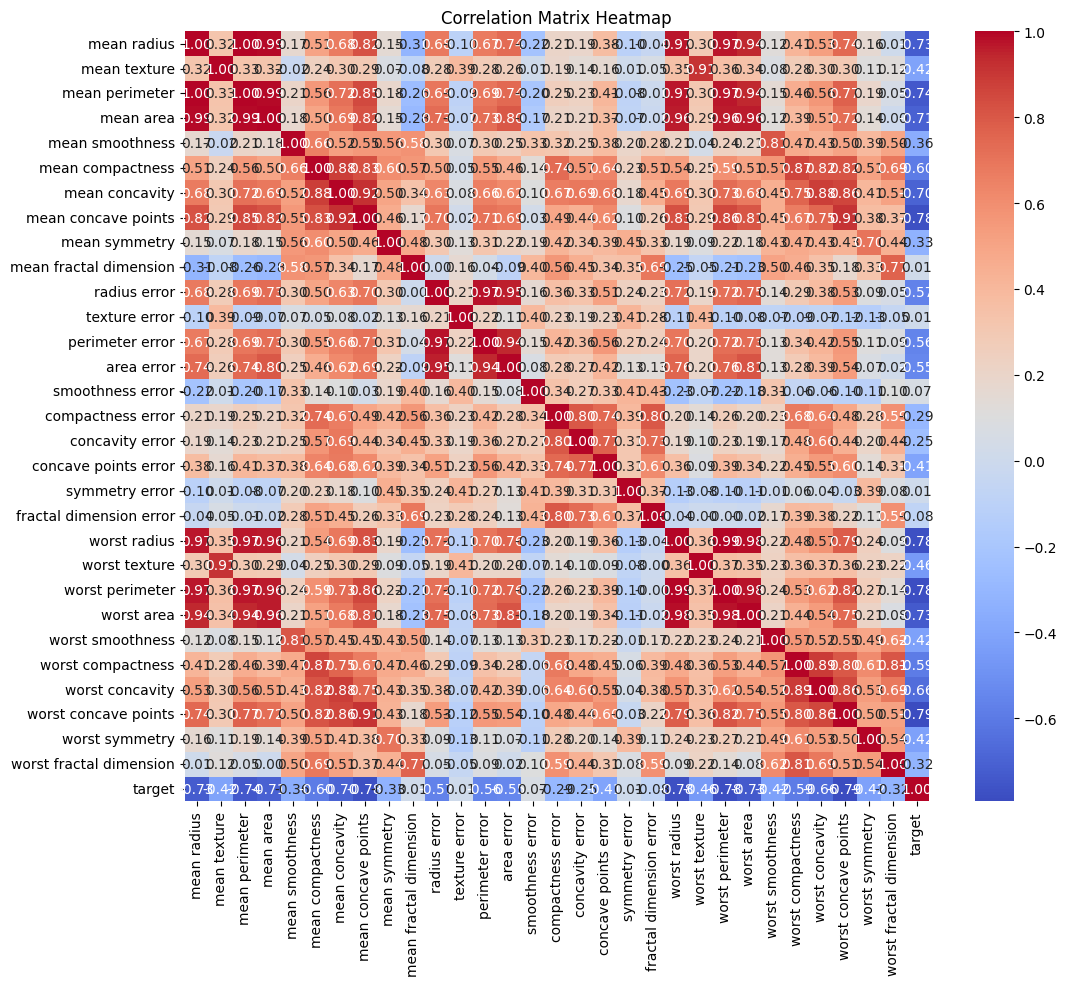

In [73]:
# Univariate statistics
univariate_stats = df.describe()
print("Univariate Statistics:\n", univariate_stats)

# Bivariate statistics - correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


Correlation Matrix:
                          mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
textur

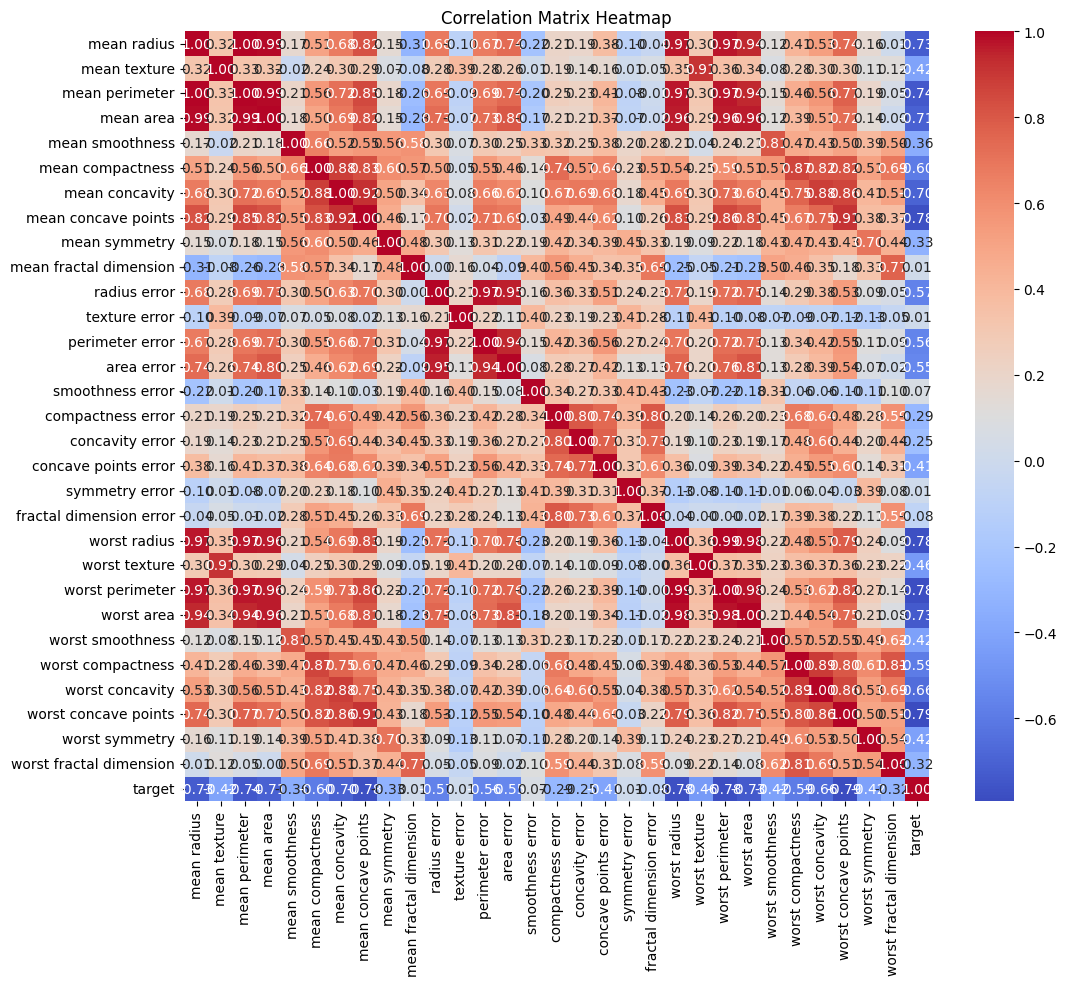

In [74]:
# Bivariate statistics - correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

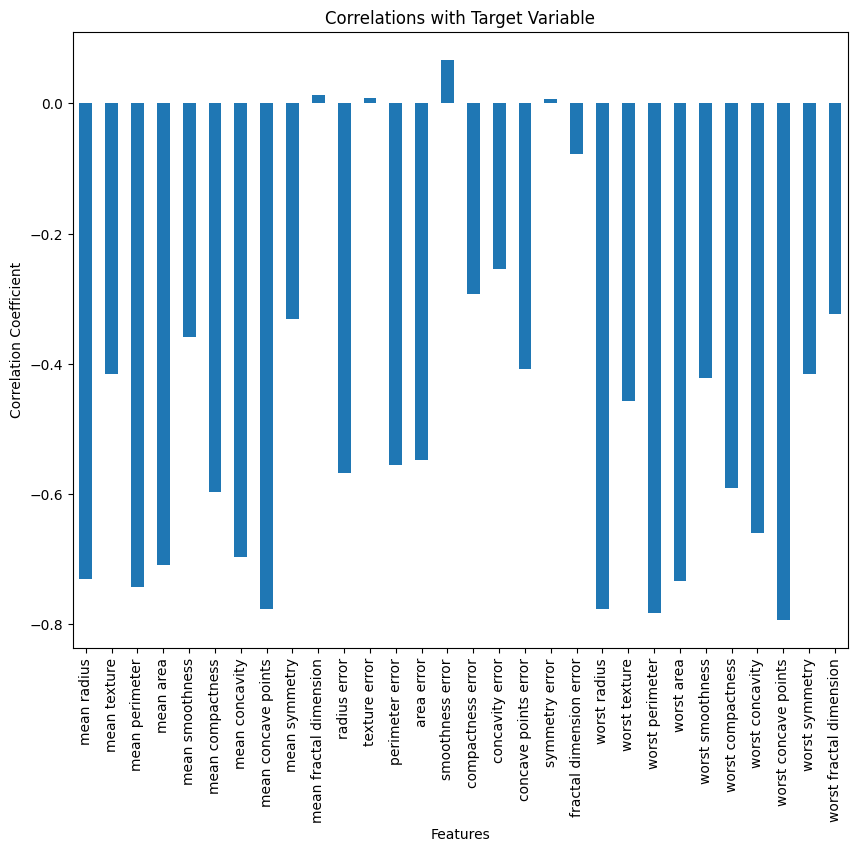

In [75]:
# Calculate correlations with the target variable
correlations_with_target = correlation_matrix['target'].drop('target')

# Plot the correlations with the target variable
plt.figure(figsize=(10, 8))
correlations_with_target.plot(kind='bar')
plt.title("Correlations with Target Variable")
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

#### 3) Recoder les variables si nécessaire


pas nécessaire

In [76]:
# Get the names of the variables (columns) in the dataframe
variable_names = df.columns.tolist()
print(variable_names)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']


#### 4) Faites une première étape de feature selection avec votre analyse des statistiques

In [77]:
# Définir le seuil de corrélation
seuil_correlation = 0.8

# Trouver les paires de caractéristiques ayant une corrélation absolue supérieure au seuil
paires_redondantes = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > seuil_correlation:
            paires_redondantes.add((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Afficher les paires de caractéristiques redondantes
print("Paires de caractéristiques redondantes (corrélation absolue > 0.8):")
for paire in paires_redondantes:
    print(paire)

Paires de caractéristiques redondantes (corrélation absolue > 0.8):
('worst radius', 'mean area')
('worst concavity', 'mean compactness')
('worst concave points', 'worst perimeter')
('area error', 'perimeter error')
('worst perimeter', 'mean radius')
('worst smoothness', 'mean smoothness')
('worst perimeter', 'worst radius')
('worst concave points', 'mean compactness')
('mean concave points', 'mean perimeter')
('mean area', 'mean perimeter')
('mean concave points', 'mean area')
('worst concave points', 'mean concavity')
('mean concavity', 'mean compactness')
('worst concavity', 'mean concavity')
('worst compactness', 'mean compactness')
('worst texture', 'mean texture')
('worst perimeter', 'mean area')
('fractal dimension error', 'compactness error')
('worst perimeter', 'mean perimeter')
('worst area', 'worst perimeter')
('worst area', 'mean concave points')
('perimeter error', 'radius error')
('worst area', 'mean radius')
('worst radius', 'mean concave points')
('worst area', 'worst r

Voici le bilan des caractéristiques les plus souvent impliquées dans les paires redondantes (corrélation absolue > 0.8) :

1. **mean concave points** : 9 occurrences  
2. **worst area** : 7 occurrences  
3. **mean area** : 7 occurrences  
4. **worst perimeter** : 7 occurrences  
5. **mean perimeter** : 6 occurrences  
6. **worst concave points** : 6 occurrences  
7. **worst radius** : 6 occurrences  
8. **mean radius** : 6 occurrences  
9. **mean compactness** : 5 occurrences  
10. **worst concavity** : 4 occurrences  
11. **mean concavity** : 4 occurrences  
12. **area error** : 4 occurrences  
13. **worst compactness** : 4 occurrences  
14. **perimeter error** : 2 occurrences  
15. **radius error** : 2 occurrences  
16. **compactness error** : 2 occurrences  

Les caractéristiques **mean concave points**, **worst area**, et **mean area** sont les plus fréquemment impliquées. Vous pouvez envisager de supprimer l'une de ces caractéristiques dans chaque paire redondante en fonction de leur corrélation avec la target.

c:\Users\nouhr\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:55:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 Features:
                  Feature  Importance
20          worst radius    0.509064
22       worst perimeter    0.178712
7    mean concave points    0.096523
27  worst concave points    0.063827
23            worst area    0.023247
3              mean area    0.014423
21         worst texture    0.014251
26       worst concavity    0.012560
10          radius error    0.010968
1           mean texture    0.009300


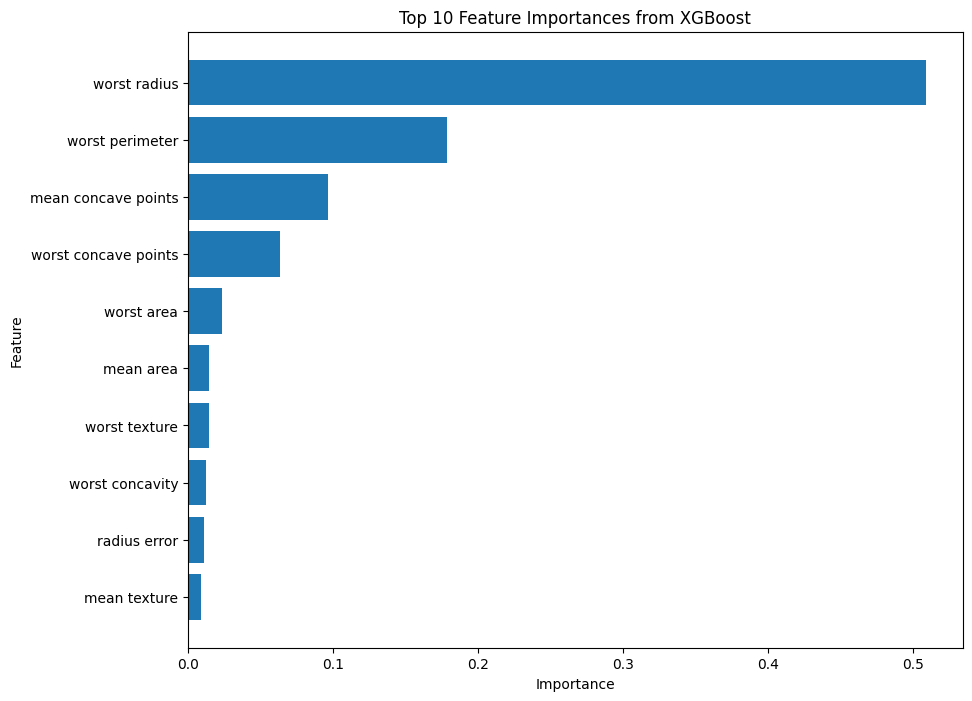

,worst radius,worst perimeter,mean concave points,worst concave points,worst area,mean area,worst texture,worst concavity,radius error,mean texture,target
0,25.38,184.60,0.14710,0.2654,2019.0,1001.0,17.33,0.7119,1.0950,10.38,0
1,24.99,158.80,0.07017,0.1860,1956.0,1326.0,23.41,0.2416,0.5435,17.77,0
2,23.57,152.50,0.12790,0.2430,1709.0,1203.0,25.53,0.4504,0.7456,21.25,0
3,14.91,98.87,0.10520,0.2575,567.7,386.1,26.50,0.6869,0.4956,20.38,0
4,22.54,152.20,0.10430,0.1625,1575.0,1297.0,16.67,0.4000,0.7572,14.34,0


In [78]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Sélectionner les caractéristiques et la cible
X = df.drop(columns=['target'])
y = df['target']

# Initialiser le modèle XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Entraîner le modèle
xgb_clf.fit(X, y)

# Obtenir les importances des caractéristiques
importances = xgb_clf.feature_importances_

# Créer un DataFrame pour les importances des caractéristiques
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Trier les caractéristiques par importance décroissante
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Sélectionner les 15 caractéristiques les plus importantes
top_10_features = feature_importances.head(10)
print("Top 10 Features:\n", top_10_features)

# Visualiser les importances des caractéristiques
plt.figure(figsize=(10, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances from XGBoost')
plt.gca().invert_yaxis()
plt.show()
# Créer un DataFrame avec les 10 variables les plus importantes et la variable cible
df_top_10 = df[top_10_features['Feature'].tolist() + ['target']]

# Afficher les premières lignes du nouveau DataFrame
df_top_10.head()

In [79]:
# Autre méthode, mais ne prend pas en compte les liens non-linéaires
# Identifier les caractéristiques impliquées dans des paires redondantes
caracteristiques_redondantes = [carac for paire in paires_redondantes for carac in paire]

# Calculer la corrélation de chaque caractéristique avec la cible
corr_target = abs(df.corr()['target']).sort_values(ascending=False)

# Prioriser les caractéristiques basées sur la corrélation avec la cible
caracteristiques_a_conserver = set()
for carac1, carac2 in paires_redondantes:
    if corr_target[carac1] >= corr_target[carac2]:
        caracteristiques_a_conserver.add(carac1)
    else:
        caracteristiques_a_conserver.add(carac2)

# Supprimer les caractéristiques redondantes
caracteristiques_finales = [carac for carac in df.columns if carac in caracteristiques_a_conserver]

# Afficher les caractéristiques finales
print("Caractéristiques sélectionnées :", caracteristiques_finales)

# Afficher les caractéristiques écartées
caracteristiques_ecartees = [carac for carac in df.columns if carac not in caracteristiques_a_conserver]
print("Caractéristiques écartées :", caracteristiques_ecartees)

Caractéristiques sélectionnées : ['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'compactness error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points']
Caractéristiques écartées : ['mean texture', 'mean smoothness', 'mean symmetry', 'mean fractal dimension', 'texture error', 'area error', 'smoothness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst symmetry', 'worst fractal dimension', 'target']


## Modélisation Binaire

#### 5) Importer les modèles suivants SGDClassifier, SVC, LogisticRegression

In [80]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
6.3) Varier les autres hyperparamètres en plus du kernel<br>

c:\Users\nouhr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\nouhr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\nouhr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\nouhr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\nouhr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\n

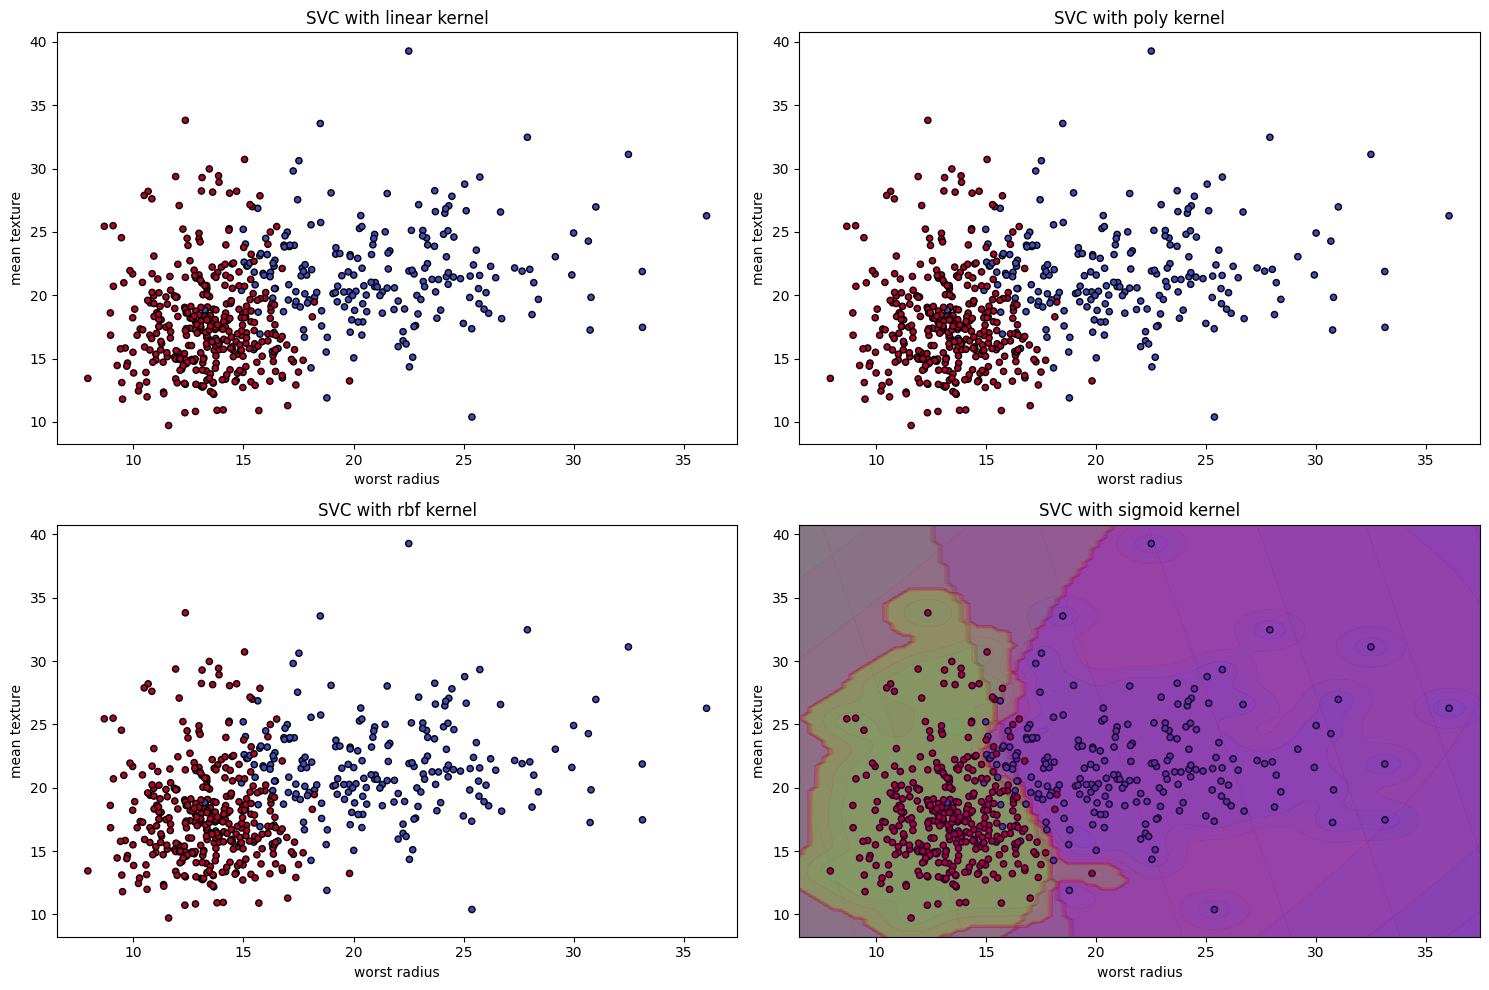

In [81]:

# Select only 2 features for this part
X = df_top_10[['worst radius', 'mean texture']]
y = df_top_10['target']

# Define the kernels to be used
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Train and plot the decision function for each kernel
for i, kernel in enumerate(kernels):
    svc = SVC(kernel=kernel, gamma='auto')
    svc.fit(X, y)
    axes[i].scatter(X['worst radius'], X['mean texture'], c=y, cmap='coolwarm', s=20, edgecolors='k')
    xlim = axes[i].get_xlim()
    ylim = axes[i].get_ylim()
    plot_predictions(svc, [xlim[0], xlim[1], ylim[0], ylim[1]])
    axes[i].set_title(f'SVC with {kernel} kernel')
    axes[i].set_xlabel('worst radius')
    axes[i].set_ylabel('mean texture')

plt.tight_layout()
plt.show()

In [82]:
#plt.scatter(<col_1>, <col_2>, c=<target>)
#plot_predictions(clf, axes)
#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

#### 7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

In [83]:
# Define the models
sgd_clf = SGDClassifier(random_state=42)
svc_clf = SVC(kernel='linear', random_state=42)
log_reg = LogisticRegression(random_state=42)

# Train the models
sgd_clf.fit(X, y)
svc_clf.fit(X, y)
log_reg.fit(X, y)

# Print the accuracy of each model
print("SGD Classifier accuracy:", sgd_clf.score(X, y))
print("SVC (linear kernel) accuracy:", svc_clf.score(X, y))
print("Logistic Regression accuracy:", log_reg.score(X, y))

# Train and evaluate SVC with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svc = SVC(kernel=kernel, random_state=42)
    svc.fit(X, y)
    print(f"SVC ({kernel} kernel) accuracy:", svc.score(X, y))

SGD Classifier accuracy: 0.8875219683655536
SVC (linear kernel) accuracy: 0.929701230228471
Logistic Regression accuracy: 0.9314586994727593
SVC (linear kernel) accuracy: 0.929701230228471
SVC (poly kernel) accuracy: 0.9420035149384886
SVC (rbf kernel) accuracy: 0.9437609841827768
SVC (sigmoid kernel) accuracy: 0.6274165202108963



On utilise un dataset avec autant features que vous souhaitez maintenant

#### 8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres 

In [84]:
from sklearn.model_selection import cross_val_score

# Define the models
sgd_clf = SGDClassifier(random_state=42)
svc_clf = SVC(kernel='linear', random_state=42)
log_reg = LogisticRegression(random_state=42)

# Perform cross-validation for each model
sgd_scores = cross_val_score(sgd_clf, X, y, cv=5, scoring='accuracy')
svc_scores = cross_val_score(svc_clf, X, y, cv=5, scoring='accuracy')
log_reg_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')

# Print the mean accuracy for each model
print("SGD Classifier mean accuracy:", sgd_scores.mean())
print("SVC (linear kernel) mean accuracy:", svc_scores.mean())
print("Logistic Regression mean accuracy:", log_reg_scores.mean())

SGD Classifier mean accuracy: 0.8419655333022822
SVC (linear kernel) mean accuracy: 0.9314702685918335
Logistic Regression mean accuracy: 0.9297158826269213


#### 9) Analyser vos résultats (metrics, erreurs de prédictions, ...)

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define the models
models = {
    "SGD Classifier": sgd_clf,
    "SVC (linear kernel)": svc_clf,
    "Logistic Regression": log_reg
}

# Train the models and make predictions
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    # Print metrics
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y, y_pred))
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    print("-" * 50)

SGD Classifier Metrics:
Accuracy: 0.8875
Precision: 0.9772
Recall: 0.8403
F1 Score: 0.9036

Confusion Matrix:
[[205   7]
 [ 57 300]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       212
           1       0.98      0.84      0.90       357

    accuracy                           0.89       569
   macro avg       0.88      0.90      0.88       569
weighted avg       0.90      0.89      0.89       569

--------------------------------------------------
SVC (linear kernel) Metrics:
Accuracy: 0.9297
Precision: 0.9249
Recall: 0.9664
F1 Score: 0.9452

Confusion Matrix:
[[184  28]
 [ 12 345]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       212
           1       0.92      0.97      0.95       357

    accuracy                           0.93       569
   macro avg       0.93      0.92      0.92       569
weighted avg       0.93      0.

Les trois modèles ont des performances similaires :

Précision et Rappel : La précision et le rappel sont élevés pour chaque modèle, suggérant qu'ils identifient bien les vrais positifs et minimisent les faux positifs.

F1 Score : Avec des scores F1 autour de 0.91 à 0.92, tous les modèles maintiennent un bon équilibre entre précision et rappel.

Matrice de Confusion : Les matrices montrent une bonne division entre vrais positifs et vrais négatifs avec un nombre acceptable de faux positifs et négatifs.

#### 10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction


In [86]:
# Define the parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize GridSearchCV with SVC and the parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Train the best model on the entire dataset
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# Make predictions with the best model
y_pred_best = best_model.predict(X)

# Calculate and print the metrics for the best model
accuracy_best = accuracy_score(y, y_pred_best)
precision_best = precision_score(y, y_pred_best)
recall_best = recall_score(y, y_pred_best)
f1_best = f1_score(y, y_pred_best)

print("Best Model Metrics:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred_best))
print("\nClassification Report:")
print(classification_report(y, y_pred_best))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9402266728768824
Best Model Metrics:
Accuracy: 0.9385
Precision: 0.9328
Recall: 0.9720
F1 Score: 0.9520

Confusion Matrix:
[[187  25]
 [ 10 347]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       212
           1       0.93      0.97      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.93       569
weighted avg       0.94      0.94      0.94       569



<center><h4> Alors, êtes-vous devenu un bon médcin et savez vous détecter un cancer??</h4></center>

Pour se prononcer il nous faudrait les prévisions d'un médecin en guise de benchmark.